In [1]:
# project: p1
# submitter: kfharrison
# partner: none
# hours: 16

In [2]:
import matplotlib.pyplot as plt
from time import time
import subprocess
from subprocess import check_output 
import numpy as np
import os
import pandas as pd
import json
import copy

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2


x = 4
maximum = 10
minimum = 5
error = bool(x < minimum or  x > maximum)
error   



True

In [5]:
#Q3

word = "KAFKAESQUE"
suffix_match =  "esque" == word.lower()[-5:] # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match




True

In [6]:
#Q4

def add(x=1,y=1):
    sum = x + y
    return sum

add(3, 4)

7

In [7]:
#Q5
add(9)

10

In [8]:
#Q6

x = 4
if x<0:
    status = "negative"    
elif x>0:
     status = "positive"
else:
     status = "zero"
    
    
    
status

'positive'

In [9]:
#Q7

nums = [3, 4, 1, 6]
  
def smart_count(lis_nums):
    t=0
    for num in lis_nums:
        if num < 0:
            break
        elif num > 10:
            continue
        else:
            t += num
            #print(type(t))
            
    return t

smart_count(nums)

14

In [10]:
#Q8

smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [11]:
#Q9

header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

#{"A":1, "B":2} == {"B":2, "A":1}





coord3["z"] = 3.14
rows




[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [12]:
#Q10


rows[0][-1]["x"]


8

In [13]:
#Q11


v2 = copy.copy(rows)

v2[0] = 8888   # first change
v2[1][1] = 9999 # second change

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#Q12

B_col=[]
for a in range(len(rows)):
    B_col.append(rows[a][header.index("B")])

sum(B_col)



10007

In [15]:
#Q13

rows.sort(key=lambda row: row[header.index("B")], reverse=True)
rows


[[3, 9999, {'x': 9, 'y': 2}],
 [1, 6, {'x': 8, 'y': 5}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#Q14





f = open("usd.json")
#data = f.read()
data = json.load(f)
#print(data)
f.close()


#print(type(data))
Num_of_euros = data["eur"]['rate']* 400
Num_of_euros

400.25981414744

In [17]:
#Q15


def divide(x=1,y=1):
#while True:
    try:
        a=x/y
        return(a)
    except ZeroDivisionError:
        return(float("nan"))
              
#divide(1,0) 


divide(3, 2)

1.5

In [18]:
#Q16

divide(-3, 0)

nan

In [19]:
#Q17


#start with getting a list of file names
dir_list = os.listdir("home-computers")
dir_list.pop(1)
sorted_dir = sorted(dir_list)
#print(sorted_dir)
years = {}
#loop over file names for name in list
for name in sorted_dir:
    #print(name)
    results_split= name[7:].split('.')
    #print(results_split)
    years[int(results_split[0])]= pd.read_csv(os.path.join("home-computers",name),skiprows=1).set_index("Geographic Area Name")
    #print(years)

sorted(years.keys())

#sorted_dir

[2013, 2014, 2015, 2016, 2017, 2018]

In [20]:
#Q18


df_18 = years[2018]

df_18.loc["Wisconsin"]["Estimate!!Total"]






2371960

In [21]:
#Q19

sum(df_18.loc[:,"Estimate!!Total!!No Computer"])

10285814

In [22]:
#Q20


max(df_18.loc[:,"Margin of Error!!Total!!No Computer"] / df_18.loc[:,"Estimate!!Total!!No Computer"])






0.12375641594322287

In [23]:
#Q21

dict_badgers = {}

states = ["Illinois", "Iowa", "Michigan", "Minnesota", "Wisconsin","Indiana"]

for state in states:
    dict_badgers[state] = 100 * (df_18.loc[state]["Estimate!!Total!!No Computer"]/df_18.loc[state]["Estimate!!Total"])


dict_badgers







{'Illinois': 8.524143737625552,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794,
 'Indiana': 9.463486214247707}

Text(0, 0.5, '% of households w/o Computers')

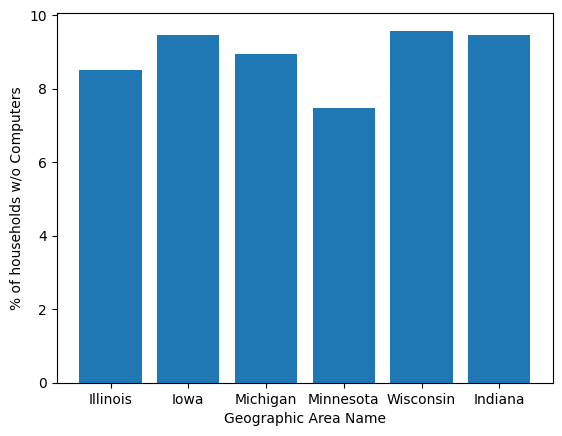

In [24]:
#Q22:

names = list(dict_badgers.keys())
values = list(dict_badgers.values())

plt.bar(names,values)
plt.xlabel('Geographic Area Name')
plt.ylabel("% of households w/o Computers")


([<matplotlib.axis.YTick at 0x7f40eb601a90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

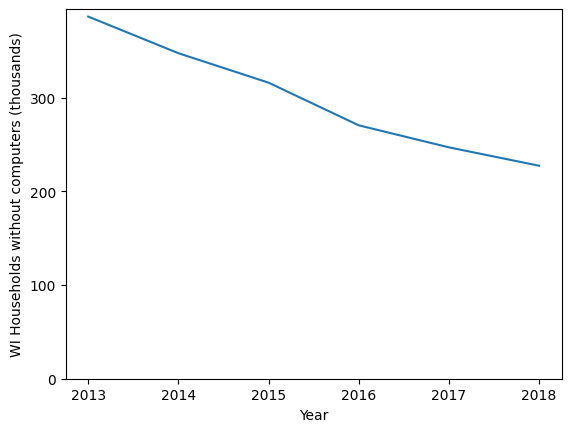

In [25]:
#Q23
x_axis = []
y_axis = []

for i in years:
    yea = years[i].loc["Wisconsin"]["Estimate!!Total!!No Computer"]
    x_axis.append(int(i))
    y_axis.append(yea/(10**3))
    



plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('WI Households without computers (thousands)')
plt.yticks(np.arange(0, 400, 100))

Text(0, 0.5, 'Tablets (millions)')

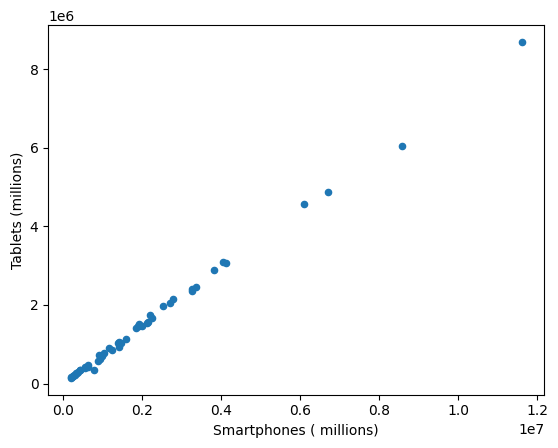

In [26]:
#Q24


df_18 = years[2018]
df_graph = df_18[["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer", "Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]]
df_graph

ax= df_graph.plot.scatter(x = ("Estimate!!Total!!Has one or more types of computing devices!!Smartphone"), y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer")

ax.set_xlabel("Smartphones ( millions)")
ax.set_ylabel("Tablets (millions)")
              


In [27]:
#Q25 

output=check_output(["git","checkout","main"],cwd = "flask") 

out_put = check_output(["git","log"],cwd = "flask") 

  

str_output = str(out_put, encoding="utf-8") 

  

str_output.split("\n")[0] 

 

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [28]:
#Q26 

list_strings = str_output.split("\n") 

list_commits=[] 



#in is the jupyter version of contains
for line in list_strings: 

    if line.startswith("commit"): 

        list_commits.append(line.split(" ")[-1]) 

         

list_commits[-50:] 

 

 

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [29]:
#Q27 

check_output(["git","checkout",list_commits[-50:][-3]],cwd = "flask") 

f = open("flask/README") 

data = f.read() 

f.close() 

  

data 

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [30]:
#Q28

list_names = []
lis_mergers = {}
list_strings=str_output.split("\n")
 

for line in list_strings: 
    #print(line)
    if "Merge pull request" in line and "/" in line:
        #split_list =line.split(" ")
        #print(split_list)
        #for ele in split_list:
            #if "/" in ele:
                #print(ele)
        name = line.split("/")[0].split(" ")[-1]
        list_names.append(name)
        for n in list_names:
            if list_names.count(n) >= 5:
                lis_mergers[n] = list_names.count(n)
lis_mergers           




{'pallets': 204,
 'greyli': 42,
 'pgjones': 14,
 'garenchan': 8,
 'ThiefMaster': 11,
 'davidism': 45,
 'dawran6': 7,
 'jeffwidman': 8,
 'lord63-forks': 5,
 'untitaker': 20,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'methane': 5,
 'SimonSapin': 11}

In [31]:
#Q29




try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
    
str(msg, "utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

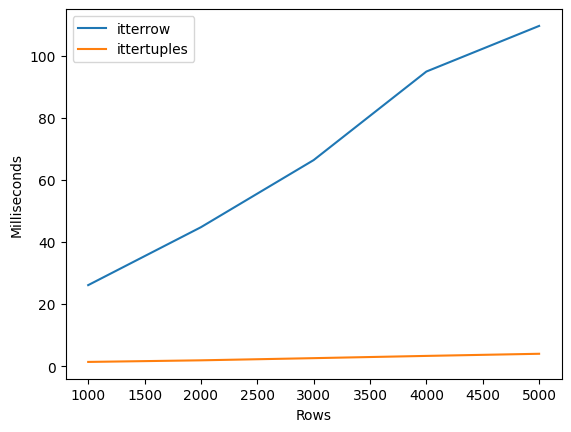

In [32]:
#Q30

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])



times_df = pd.DataFrame(dtype=float)
for row_size in [1000,2000,3000,4000,5000]:
    df = rand_df(row_size)
    
    
    t0 = time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    for row in df.iterrows():
        #print(row)
        pass
    t1 = time()
    times_df.at[row_size, "itterrow"] = (t1-t0)*1000
    
    
    t0 = time()
    for row in df.itertuples():
        #print(row)
        pass
    t1 = time()
    times_df.at[row_size, "ittertuples"] = (t1-t0)*1000
times_df.plot(xlabel = "Rows", ylabel = "Milliseconds")

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

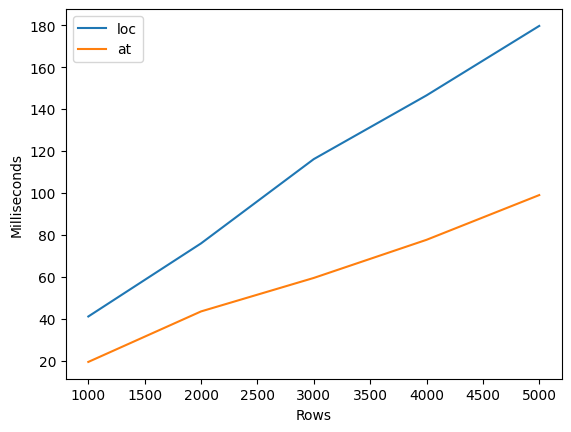

In [33]:
#Q31

q31_df = pd.DataFrame(dtype=float)
for row_size in [1000,2000,3000,4000,5000]:
    df = rand_df(row_size)

    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time()
    q31_df.at[row_size, "loc"] = (t1-t0)*1000
    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time()

    q31_df.at[row_size, "at"] = (t1-t0)*1000
    #print(q31_df)


q31_df.plot(xlabel = "Rows", ylabel = "Milliseconds")

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

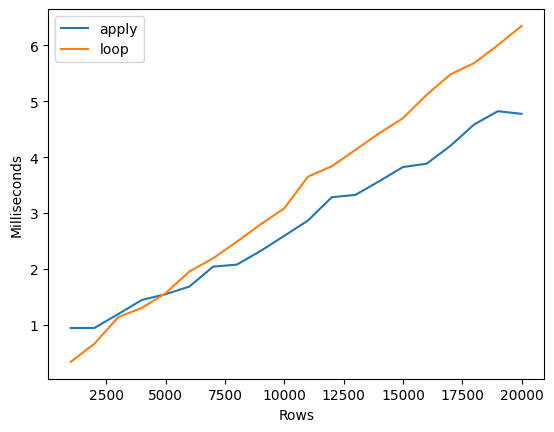

In [34]:
#Q32


def laugh(x):
    return "ha" * x


q32_df = pd.DataFrame(dtype=float)
for row_size in range(1000, 21000, 1000):
    df = rand_df(row_size)

    t0 = time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    result = df["A"].apply(laugh).tolist()
    t1 = time()
    q32_df.at[row_size, "apply"] = (t1-t0)*1000
    
    t0 = time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time()
    q32_df.at[row_size, "loop"] = (t1-t0)*1000
    
q32_df.plot(xlabel = "Rows", ylabel = "Milliseconds")